# Clustering validation
## importing libraries

In [1]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

## creating artificial data set

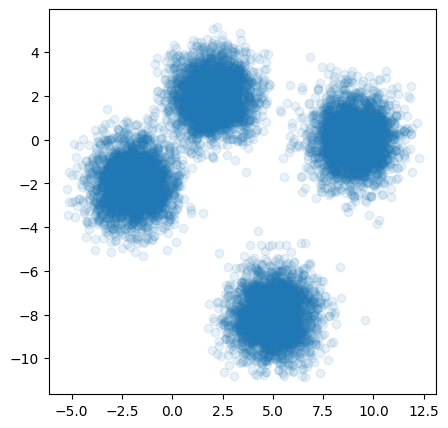

In [2]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
    np.random.normal((9, 0), size=(n_samples, 2)),
    np.random.normal((5, -8), size=(n_samples, 2))
))

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], alpha=.1)
plt.show()

# fitting the fuzzy-c-means
 - create models with 2, 3, 4, 5, 6 and 6 centers

In [3]:
# n_clusters_list = range(2, 10)
n_clusters_list = [2, 3, 4, 5, 6, 7]

models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X)
    models.append(fcm)

# showing results

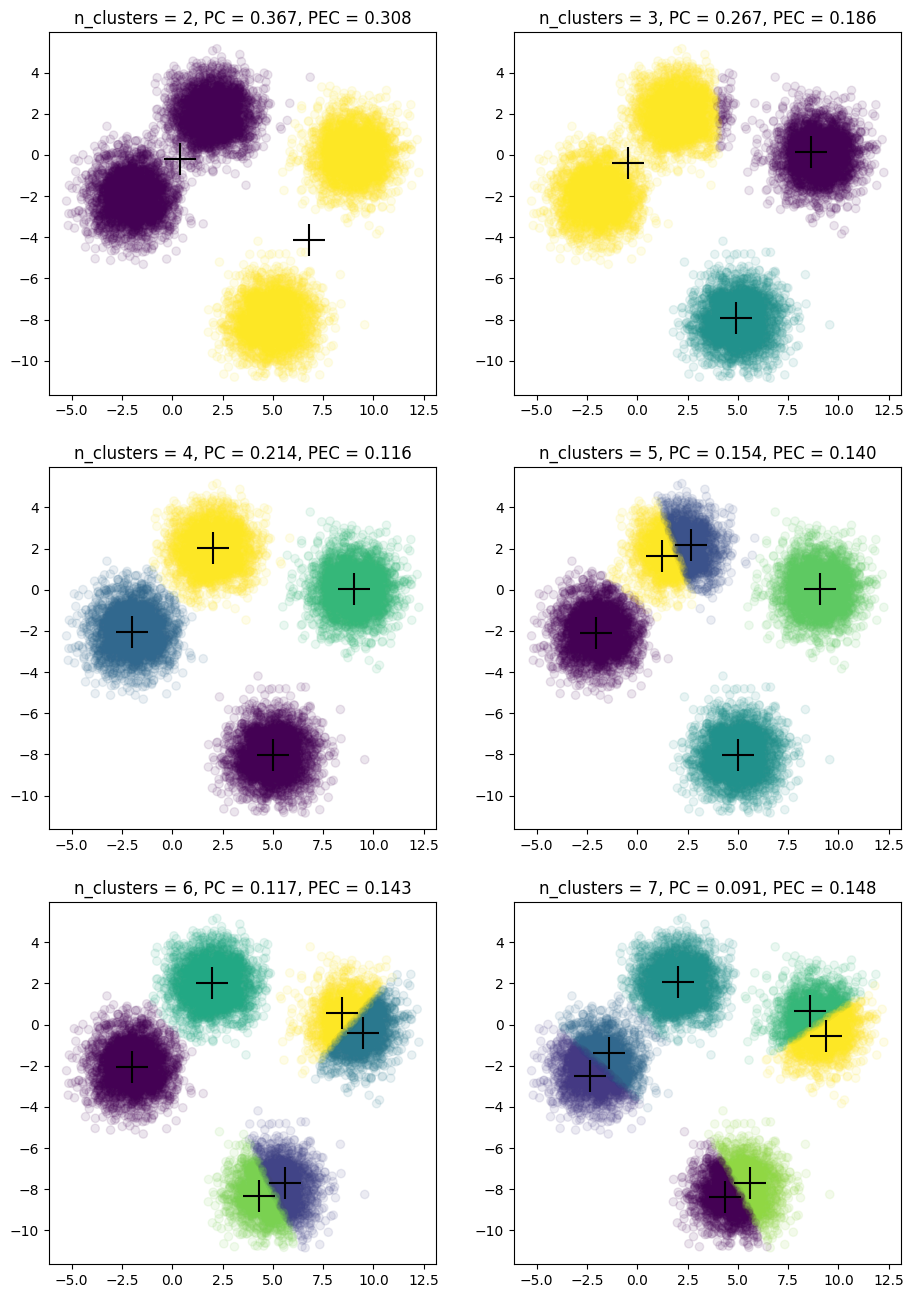

In [4]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
pcs = list()
pecs = list()
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    # 分配系数
    pc = model.partition_coefficient
    pcs.append(pc)
    # 分区熵系数
    pec = model.partition_entropy_coefficient
    pecs.append(pec)
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

note that the model with 4 clusters obtained the highest partition coefficient (PC) value and the lowerst partition entropy coefficient (PEC) value for this example.

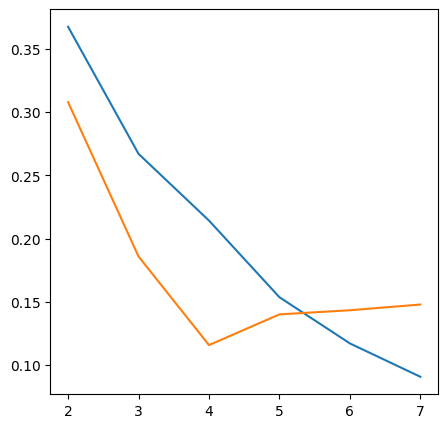

In [6]:
plt.figure(figsize=(5, 5))
# plt.scatter(X[:,0], X[:,1], alpha=.1)
plt.plot(n_clusters_list, pcs)
plt.plot(n_clusters_list, pecs)

plt.show()